In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Antecedent
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age') # age [0, 100]
cholesterol = ctrl.Antecedent(np.arange(0, 301, 1), 'cholesterol') # cholesterol [0, 300]
smoking = ctrl.Antecedent(np.arange(-0.1, 1.1, 0.00001), 'smoking') # smoking 0,1
blood_pressure = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_pressure') # blood_pressure [0, 200]
blood_sugar = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_sugar') # blood_sugar [0, 200]
family_history = ctrl.Antecedent(np.arange(0, 11, 1), 'family_history') # family_history [0, 10]
exercise = ctrl.Antecedent(np.arange(-0.1, 1.1, 0.00001), 'exercise') # exercise 0,1
heart_rate = ctrl.Antecedent(np.arange(0, 201, 1), 'heart_rate') # heart_rate [0, 200]
sex = ctrl.Antecedent(np.arange(-0.1, 1.1, 0.00001), 'sex') # sex 0, 1

# Consequent
likelihood = ctrl.Consequent(np.arange(-30, 131, 1), 'likelihood') # likelihood [0, 100]

/Users/ammar/anaconda3/envs/ML/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


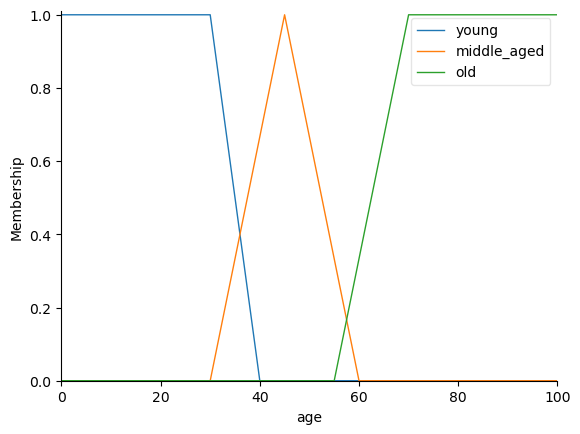

In [3]:
# age (young, middle_aged, old)
age['young'] = fuzz.trapmf(age.universe, [0, 0, 30, 40])
age['middle_aged'] = fuzz.trimf(age.universe, [30, 45, 60])
age['old'] = fuzz.trapmf(age.universe, [55, 70, 100, 100])
age.view()

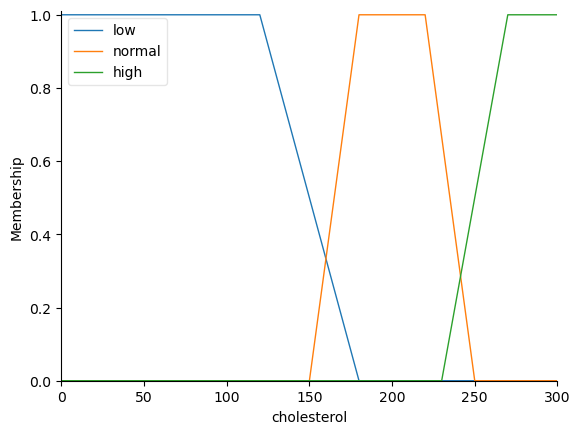

In [4]:
# cholesterol (low, normal, high)
cholesterol['low'] = fuzz.trapmf(cholesterol.universe, [0, 0, 120, 180])
cholesterol['normal'] = fuzz.trapmf(cholesterol.universe, [150, 180, 220, 250])
cholesterol['high'] = fuzz.trapmf(cholesterol.universe, [230, 270, 300, 300])
cholesterol.view()

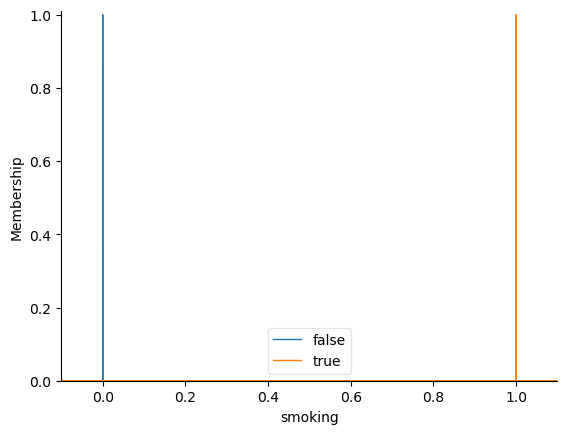

In [5]:
# smoking (false, true)
smoking['false'] = fuzz.gaussmf(smoking.universe, 0, 0.00001)
smoking['true'] = fuzz.gaussmf(smoking.universe, 1, 0.00001)
smoking.view()

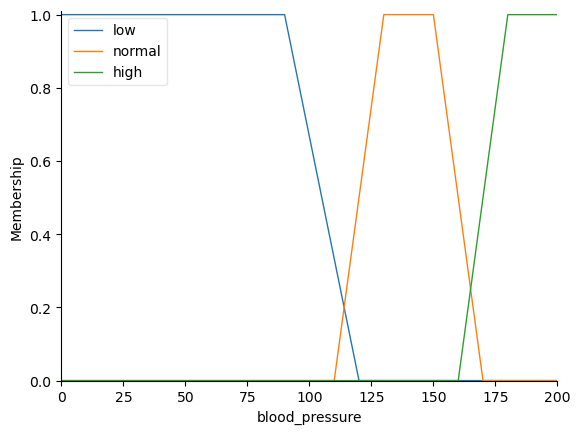

In [6]:
# blood_pressure (low, normal, high)
blood_pressure['low'] = fuzz.trapmf(blood_pressure.universe, [0, 0, 90, 120])
blood_pressure['normal'] = fuzz.trapmf(blood_pressure.universe, [110, 130, 150, 170])
blood_pressure['high'] = fuzz.trapmf(blood_pressure.universe, [160, 180, 200, 200])
blood_pressure.view()

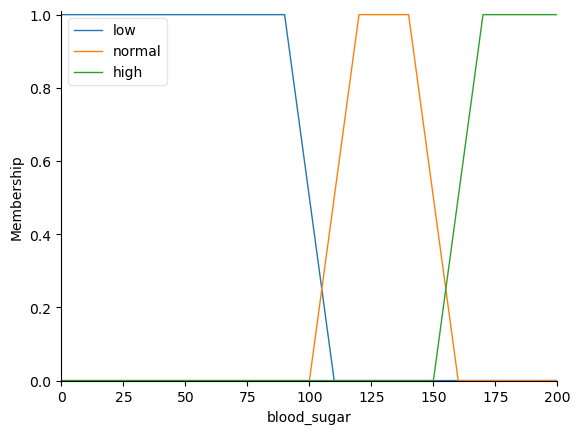

In [7]:
# blood_sugar (low, normal, high)
blood_sugar['low'] = fuzz.trapmf(blood_sugar.universe, [0, 0, 90, 110])
blood_sugar['normal'] = fuzz.trapmf(blood_sugar.universe, [100, 120, 140, 160])
blood_sugar['high'] = fuzz.trapmf(blood_sugar.universe, [150, 170, 200, 200])
blood_sugar.view()

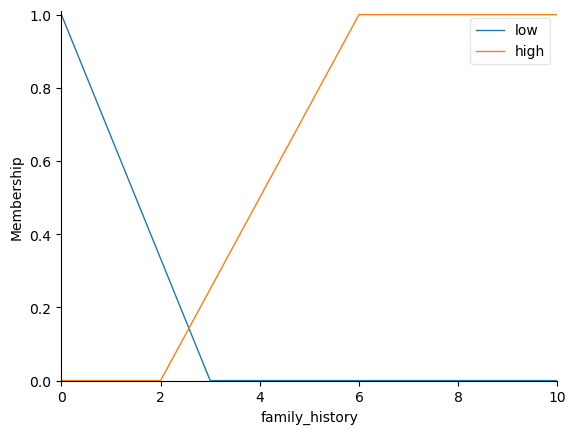

In [8]:
# family_history (low, high)
family_history['low'] = fuzz.trimf(family_history.universe, [0, 0, 3])
family_history['high'] = fuzz.trapmf(family_history.universe, [2, 6, 10, 10])
family_history.view()

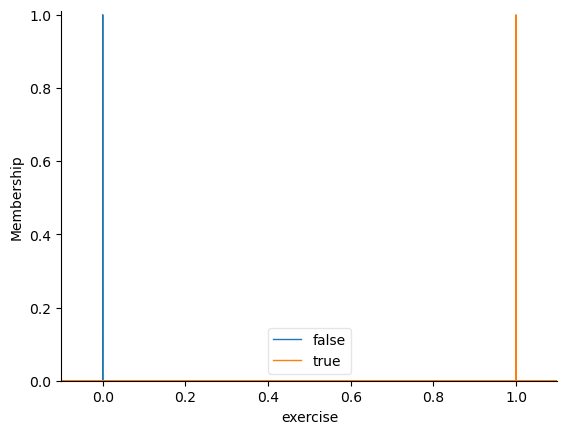

In [9]:
# exercise (false, true)
exercise['false'] = fuzz.gaussmf(exercise.universe, 0, 0.00001)
exercise['true'] = fuzz.gaussmf(exercise.universe, 1, 0.00001)
exercise.view()

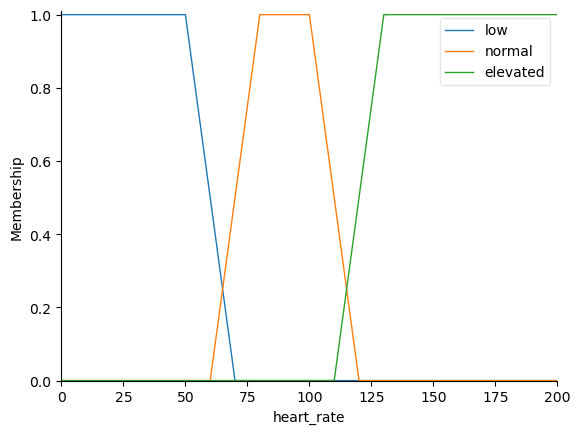

In [10]:
# heart_rate (low, normal, elevated)
heart_rate['low'] = fuzz.trapmf(heart_rate.universe, [0, 0, 50, 70])
heart_rate['normal'] = fuzz.trapmf(heart_rate.universe, [60, 80, 100, 120])
heart_rate['elevated'] = fuzz.trapmf(heart_rate.universe, [110, 130, 200, 200])
heart_rate.view()

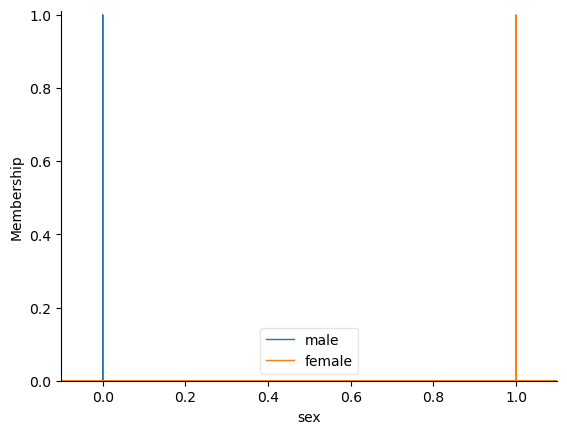

In [11]:
# sex (male, female)
sex['male'] = fuzz.gaussmf(sex.universe, 0, 0.00001)
sex['female'] = fuzz.gaussmf(sex.universe, 1, 0.00001)
sex.view()

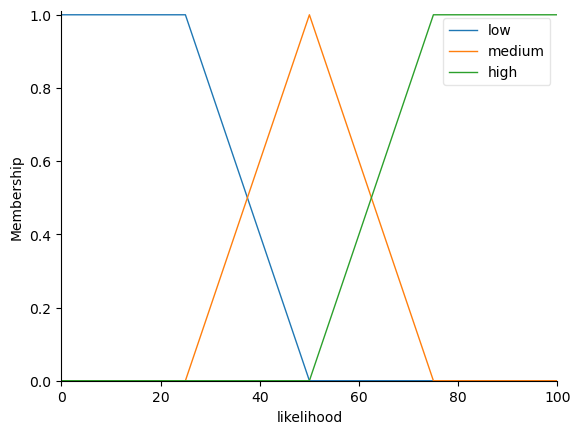

In [12]:
# likelihood (low, medium, high)
likelihood['low'] = fuzz.trapmf(likelihood.universe, [-30, -30, 25, 50])
likelihood['medium'] = fuzz.trimf(likelihood.universe, [25, 50, 75])
likelihood['high'] = fuzz.trapmf(likelihood.universe, [50, 75, 130, 130])
likelihood.view()

In [13]:
diagnosis_ctrl = ctrl.ControlSystem([
    ctrl.Rule(
        age['young']
        & cholesterol['low']
        & smoking['false']
        & blood_pressure['normal']
        & blood_sugar['normal']
        & family_history['low']
        & exercise['true']
        & heart_rate['normal']
        & (sex['female'] | sex['male']),
        likelihood['low']
    ),
    ctrl.Rule(
        age['middle_aged']
        & cholesterol['normal']
        & smoking['false']
        & blood_pressure['normal']
        & blood_sugar['normal']
        & family_history['low']
        & exercise['true']
        & heart_rate['normal']
        & sex['male'],
        likelihood['low']
    ),
    ctrl.Rule(
        age['old']
        & cholesterol['high']
        & (
            smoking['true']
            | blood_pressure['high']
            | blood_sugar['high']
            | family_history['high']
        )
        & exercise['false']
        & heart_rate['elevated']
        & sex['male'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['middle_aged']
        & (cholesterol['high'] | blood_pressure['high'])
        & (blood_sugar['high'] | family_history['high'])
        & exercise['false']
        & heart_rate['elevated']
        & sex['female'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['young']
        & cholesterol['high']
        & smoking['true']
        & (blood_pressure['high'] | blood_sugar['high'] | family_history['high'])
        & exercise['false']
        & heart_rate['elevated']
        & sex['male'],
        likelihood['medium']
    ),
    ctrl.Rule(
        age['old']
        & cholesterol['normal']
        & smoking['false']
        & blood_pressure['high']
        & blood_sugar['normal']
        & family_history['low']
        & exercise['true']
        & heart_rate['normal']
        & sex['female'],
        likelihood['medium']
    ),
    ctrl.Rule(
        age['young']
        & (cholesterol['high'] | blood_pressure['high'])
        & smoking['true']
        & blood_sugar['high']
        & family_history['high']
        & exercise['false']
        & heart_rate['elevated']
        & sex['male'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['middle_aged']
        & (cholesterol['high'] | blood_pressure['high'])
        & smoking['true']
        & blood_sugar['high']
        & family_history['high']
        & exercise['false']
        & heart_rate['elevated']
        & sex['male'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['old']
        & cholesterol['high']
        & (
            smoking['true']
            | blood_pressure['high']
            | blood_sugar['high']
            | family_history['high']
        )
        & exercise['true']
        & heart_rate['elevated']
        & sex['male'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['middle_aged']
        & cholesterol['normal']
        & smoking['false']
        & blood_pressure['high']
        & blood_sugar['normal']
        & family_history['low']
        & exercise['true']
        & heart_rate['elevated']
        & sex['female'],
        likelihood['medium']
    ),
    ctrl.Rule(
        age['young']
        & cholesterol['low']
        & smoking['false']
        & blood_pressure['high']
        & blood_sugar['normal']
        & family_history['high']
        & exercise['true']
        & heart_rate['normal']
        & sex['female'],
        likelihood['medium']
    ),
    ctrl.Rule(
        age['old']
        & cholesterol['high']
        & (
            smoking['true']
            | blood_pressure['high']
            | blood_sugar['high']
            | family_history['high']
        )
        & exercise['false']
        & heart_rate['elevated']
        & sex['female'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['middle_aged']
        & (cholesterol['high'] | blood_pressure['high'])
        & (blood_sugar['high'] | family_history['high'])
        & exercise['false']
        & heart_rate['elevated']
        & sex['male'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['young']
        & cholesterol['high']
        & smoking['true']
        & (blood_pressure['high'] | blood_sugar['high'] | family_history['high'])
        & exercise['false']
        & heart_rate['elevated']
        & sex['female'],
        likelihood['high']
    ),
    ctrl.Rule(
        age['old']
        & cholesterol['normal']
        & smoking['false']
        & blood_pressure['high']
        & blood_sugar['normal']
        & family_history['low']
        & exercise['true']
        & heart_rate['normal']
        & sex['male'],
        likelihood['medium']
    )
])

In [14]:
backup_diagnosis_ctrl = ctrl.ControlSystem([
    
    ctrl.Rule(age['young'], likelihood['low']),
    ctrl.Rule(age['middle_aged'], likelihood['medium']),
    ctrl.Rule(age['old'], likelihood['high']),

    ctrl.Rule(cholesterol['low'], likelihood['medium']),
    ctrl.Rule(cholesterol['normal'], likelihood['low']),
    ctrl.Rule(cholesterol['high'], likelihood['high']),

    ctrl.Rule(smoking['false'], likelihood['low']),
    ctrl.Rule(smoking['true'], likelihood['high']),

    ctrl.Rule(blood_pressure['low'], likelihood['medium']),
    ctrl.Rule(blood_pressure['normal'], likelihood['low']),
    ctrl.Rule(blood_pressure['high'], likelihood['high']),

    ctrl.Rule(blood_sugar['low'], likelihood['medium']),
    ctrl.Rule(blood_sugar['normal'], likelihood['low']),
    ctrl.Rule(blood_sugar['high'], likelihood['high']),

    ctrl.Rule(family_history['low'], likelihood['low']),
    ctrl.Rule(family_history['high'], likelihood['medium']),

    ctrl.Rule(exercise['false'], likelihood['medium']),
    ctrl.Rule(exercise['true'], likelihood['low']),

    ctrl.Rule(heart_rate['low'], likelihood['medium']),
    ctrl.Rule(heart_rate['normal'], likelihood['low']),
    ctrl.Rule(heart_rate['elevated'], likelihood['high'])    
])

In [15]:
diagnosis = ctrl.ControlSystemSimulation(diagnosis_ctrl)

diagnosis.input['age'] = 100
diagnosis.input['cholesterol'] = 300
diagnosis.input['smoking'] = 1
diagnosis.input['blood_pressure'] = 300
diagnosis.input['blood_sugar'] = 200
diagnosis.input['family_history'] = 10
diagnosis.input['exercise'] = 0
diagnosis.input['heart_rate'] = 300
diagnosis.input['sex'] = 1 

diagnosis.compute()
print(diagnosis.output['likelihood'])

80.55555547787516


In [16]:
backup_diagnosis = ctrl.ControlSystemSimulation(backup_diagnosis_ctrl)

backup_diagnosis.input['age'] = 100
backup_diagnosis.input['cholesterol'] = 300
backup_diagnosis.input['smoking'] = 1
backup_diagnosis.input['blood_pressure'] = 300
backup_diagnosis.input['blood_sugar'] = 200
backup_diagnosis.input['family_history'] = 10
backup_diagnosis.input['exercise'] = 0
backup_diagnosis.input['heart_rate'] = 300
# backup_diagnosis.input['sex'] = 1 

backup_diagnosis.compute()
print(backup_diagnosis.output['likelihood'])

68.9803294229174
